Import all modules

In [52]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the dataset

In [53]:
# load dataset
dataset = read_csv('/content/drive/MyDrive/datasets/diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
# Basic data cleaning
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
dataset.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Exploratory Data Analysis (EDA)

Outcome
0    500
1    268
dtype: int64


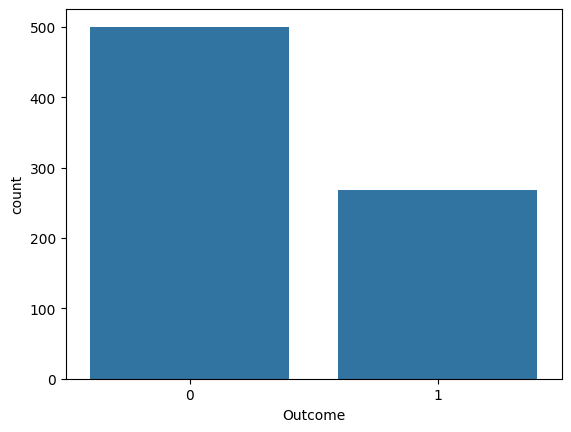

In [56]:
# count diabetes with graph
sns.countplot(x='Outcome', data=dataset)
# diabetes count
print(dataset.groupby('Outcome').size())


<Axes: xlabel='Outcome', ylabel='Age'>

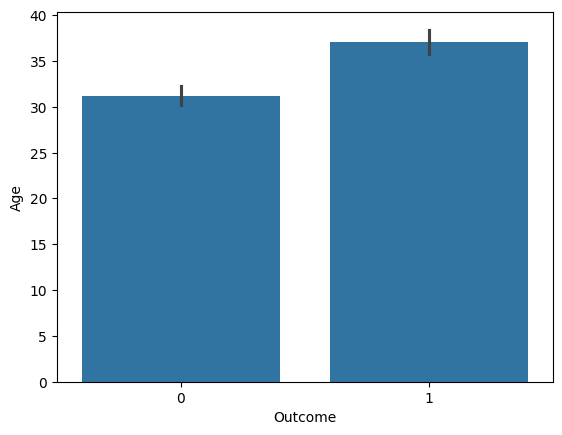

In [57]:
# survival rate by age
sns.barplot(x='Outcome', y='Age', data=dataset)

In [58]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


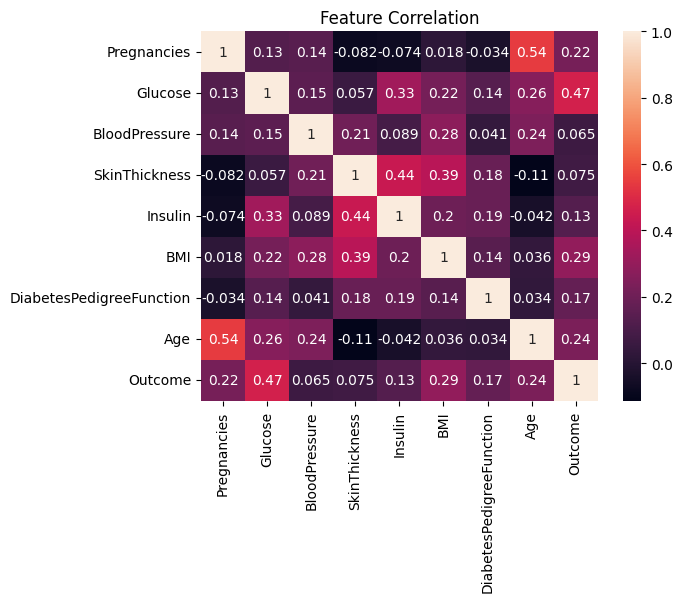

In [59]:
# heatmap for correlation
sns.heatmap(dataset.corr(), annot=True, )
plt.title('Feature Correlation')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
# define train , test, and perform feature scaling
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [62]:
# Scale feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Testing Data:")
display(X_test_scaled.head())

Scaled Training Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095



Scaled Testing Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101


In [63]:
print(f'X_train shape: {X_train_scaled.shape}')
print(f'X_test shape: {X_test_scaled.shape}')

X_train shape: (614, 8)
X_test shape: (154, 8)


In [64]:
# ml model logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# train the model
model_Log = LogisticRegression()
model_Log.fit(X_train_scaled, y_train)

LogisticRegression()

In [67]:
# predict with test data
pred_log = model_Log.predict(X_test_scaled)
# get the accuracy
accuracy_log = accuracy_score(y_test, pred_log)
print(f'Accuracy: {accuracy_log}')
print(classification_report(y_test, pred_log))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [74]:
# ml model KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=19)
model_knn.fit(X_train_scaled, y_train )

KNeighborsClassifier(n_neighbors=19)

In [75]:
# predict with test data
pred_knn = model_knn.predict(X_test_scaled)
# get the accuracy
accuracy_knn = accuracy_score(y_test, pred_knn)
print(f'Accuracy: {accuracy_knn}')
print(classification_report(y_test, pred_knn))

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



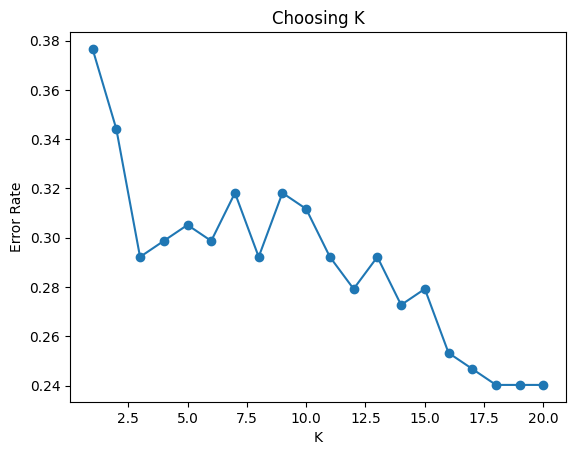

In [76]:
# choosing the right k
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

# found best k is 19 or 21
# so n_neighbors = 19 0r 20

In [77]:
# ml model Decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [79]:
# predict with our test data
pred_dt = model_dt.predict(X_test_scaled)
# get the accuracy
accuracy_dt = accuracy_score(y_test, pred_dt)
print(f'Accuracy: {accuracy_dt}')
print(classification_report(y_test, pred_dt))

Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [80]:
# ml model Random forrest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# predict with our test data
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [85]:
## 📊 Comparison between all ml model

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, pred_log),
              accuracy_score(y_test, pred_knn),
              accuracy_score(y_test, pred_dt),
              accuracy_score(y_test, pred_rf)]
print(accuracies)

[0.7532467532467533, 0.7597402597402597, 0.7272727272727273, 0.7207792207792207]


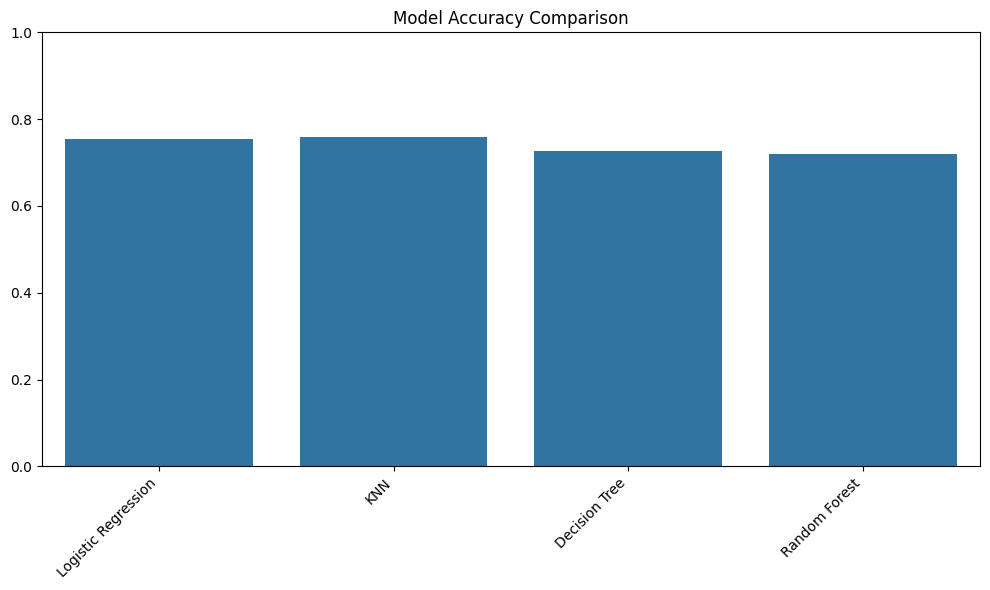

In [84]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Decision:
Based on the accuracy and the classification reports you've provided for each model, let's analyze which one might be the best choice for predicting whether a person has diabetes.

Here's a quick look at the accuracies:

Logistic Regression: ~0.753<br>
KNN: ~0.760<br>
Decision Tree: ~0.727<br>
Random Forest: ~0.721<br>
Based purely on overall accuracy, the KNN model has a slightly higher accuracy (76.0%) compared to Logistic Regression (75.3%), Decision Tree (72.7%), and Random Forest (72.1%).

However, for a medical prediction task like diabetes, overall accuracy isn't the only metric to consider. As we discussed, the cost of a false negative (predicting no diabetes when the person actually has it) is likely higher than a false positive (predicting diabetes when they don't). Therefore, recall for the positive class (Outcome 1) is a very important metric.

Let's look at the recall for Outcome 1 (diabetes) from your classification reports:

Logistic Regression: Recall for class 1 is 0.67.<br>
KNN: Recall for class 1 is 0.55.<br>
Decision Tree: Recall for class 1 is 0.64.<br>
Random Forest: Recall for class 1 is 0.62.<br>
Considering the importance of minimizing false negatives in diabetes prediction, the Logistic Regression model has the highest recall (0.67) for the positive class (Outcome 1) among the models you've tested. This means it was able to identify a higher percentage of actual diabetes cases in the test set compared to the other models.

While KNN had the highest overall accuracy, its recall for the positive class was significantly lower (0.55). This suggests that while KNN is slightly better at overall correct predictions, it misses more actual diabetes cases than Logistic Regression.